In [3]:
!pip install numpy scikit-learn tsplib95 python_tsp k-means-constrained

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import numpy as np
import tsplib95
from python_tsp.distances.tsplib_distance import tsplib_distance_matrix

dataset = "data/pbl395.tsp"

initial_cities = np.atleast_2d(list(tsplib95.load(dataset).node_coords.values()))
distance_matrix = tsplib_distance_matrix(dataset)

In [5]:
def can_stop(CLUSTERS, min_size):
    for c in CLUSTERS:
        if len(c) <= min_size:
            return True
    return False

In [6]:
from algo.get_clusters import get_clusters

CLUSTERS, CENTROIDS = get_clusters(initial_cities, 5)

In [7]:
can_stop(CLUSTERS, 10)

False

In [8]:
from algo.concatenate_all import concatenate_all

result, centroid = concatenate_all(CLUSTERS, CENTROIDS)

In [9]:
from algo.get_clusters import get_clusters
from algo.concatenate_all import concatenate_all
from python_tsp.distances.euclidean_distance import euclidean_distance_matrix
from python_tsp.heuristics.local_search import solve_tsp_local_search

def solve_cluster_tsp(initial_cities, N_CLUSTERS = 8, MIN_SIZE = 10):

    if len(initial_cities) <= N_CLUSTERS * 4:
        distance_matrix = euclidean_distance_matrix(initial_cities)
        permutation, distance = solve_tsp_local_search(distance_matrix)
        # print(distance)
        subset = np.atleast_2d([initial_cities[x] for x in permutation])
        # print(subset)
        return subset, np.mean(initial_cities, axis=0)

    CLUSTERS, CENTROIDS = get_clusters(initial_cities, N_CLUSTERS)
    solved_clusters = []
    for cluster in CLUSTERS:
        solved_clusters.append(solve_cluster_tsp(cluster, N_CLUSTERS - 1, MIN_SIZE)[0])

    return concatenate_all(solved_clusters, CENTROIDS)

In [10]:
result, _ = solve_cluster_tsp(initial_cities)
print(result)

[]
[[ 57  45]
 [ 63  41]
 [ 63  42]
 [ 63  43]
 [ 71  46]
 [ 71  37]
 [ 71  36]
 [ 72  38]
 [ 74  41]
 [ 74  43]
 [ 79  45]
 [ 80  45]
 [ 80  40]
 [ 84  41]
 [ 84  43]
 [ 80  50]
 [ 79  50]
 [ 78  50]
 [ 78  45]
 [ 74  47]
 [ 71  53]
 [ 71  56]
 [ 71  58]
 [ 71  60]
 [ 71  61]
 [ 74  61]
 [ 78  61]
 [ 78  65]
 [ 74  68]
 [ 74  65]
 [ 71  64]
 [ 71  65]
 [ 71  72]
 [ 71  73]
 [ 71  74]
 [ 78  71]
 [ 80  67]
 [ 79  63]
 [ 84  60]
 [ 84  64]
 [ 84  68]
 [ 80  75]
 [ 74  83]
 [ 84  83]
 [ 94  78]
 [ 97  77]
 [ 94  69]
 [ 94  71]
 [ 94  73]
 [ 94  76]
 [ 81  80]
 [ 94  67]
 [ 94  65]
 [ 94  63]
 [ 94  57]
 [103  59]
 [103  66]
 [107  66]
 [107  74]
 [107  83]
 [108  89]
 [ 97  83]
 [104  80]
 [103  75]
 [102  75]
 [101  75]
 [103  74]
 [103  67]
 [109  57]
 [109  55]
 [110  50]
 [103  50]
 [ 94  50]
 [ 94  45]
 [ 87  38]
 [ 87  35]
 [ 97  40]
 [100  42]
 [101  42]
 [109  46]
 [109  47]
 [109  48]
 [122  45]
 [110  37]
 [110  34]
 [110  32]
 [110  29]
 [110  25]
 [110  23]
 [110  22]
 [110  

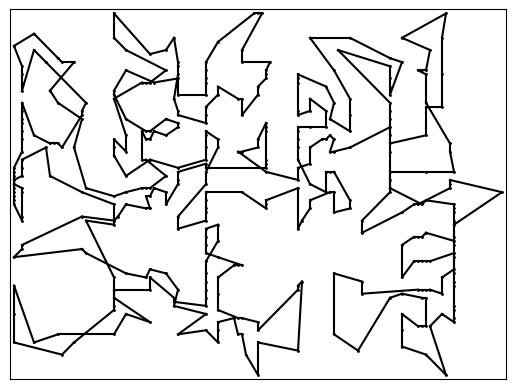

In [11]:
from plotting.plot_path import plot_path

plot_path(result)